                                            CS 584 MACHINE LEARNING
                                                Crime Prediction 

                                                                         Team Members:
                                                                                       Prajakta Yerpude  A20376063
                                                                                       Akash Pipalia     A20380807
                                                                                       Suveen Mekala     A20379568
                                                                                                    


Demographics and Crime Rate

1. Decision Trees

In this problem, you will use the clean dataset to predict whether the crime rate in a locality is greater than 0.1 per capita or not. 

In [1]:
# a. Create a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise.
#    What are the percentage of positive and negative instances in the dataset?
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/suveen/Documents/Crime Prediction Data/communities-crime-clean.csv")
df['HighCrime'] = (df['ViolentCrimesPerPop'] > 0.1)

a = pd.value_counts(df['HighCrime'].values, sort=True)
                                     
#Count the number of positive and negative instances in a database

total = a[True] + a[False]
pTrue = (a[True] / total) * 100
pFalse = (a[False] / total) * 100

#Percentage of positive instances
print ("Positive instances: %.4f" %pTrue, "%") 

#Percentage of negative instances
print ("Negative instances: %.4f" %pFalse, "%")


Positive instances: 62.7195 %
Negative instances: 37.2805 %


In [2]:
df

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,HighCrime
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.00,0.06,False
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.00,0.14,True
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.00,1.00,True
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.00,0.23,True
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.00,0.15,True
5,1,Bessemercity,6,0.04,0.44,1.00,0.10,0.00,0.00,0.43,...,0.96,0.74,0.95,0.89,0.11,0.07,0.13,0.00,1.00,True
6,1,Birminghamcity,2,0.41,0.37,1.00,0.02,0.03,0.01,0.41,...,0.90,0.64,0.86,0.82,0.43,0.15,0.20,0.38,1.00,True
7,1,Cullmancity,1,0.01,0.30,0.00,0.99,0.02,0.01,0.38,...,0.82,0.54,0.72,0.76,0.04,0.07,0.01,0.00,0.16,True
8,1,Daphnecity,7,0.00,0.39,0.31,0.75,0.02,0.02,0.35,...,0.60,0.46,0.40,0.54,0.03,0.08,0.01,0.00,0.05,False
9,1,Decaturcity,10,0.06,0.39,0.32,0.73,0.04,0.01,0.39,...,0.71,0.47,0.61,0.60,0.14,0.09,0.01,0.00,0.22,True


As the dataframe consists of string and boolean i.e 'Community Name' and 'High Crime', we wrote the encoding function that converts the string and boolean values to integer values. 

In [3]:
def encode_target(data_frame, target_column, new_col_name):
    df_mod = data_frame.copy()
    targets = df_mod[target_column].unique()
    if df_mod[target_column].dtype == np.bool :
        df_mod[new_col_name] = df_mod[target_column].astype(int)
    else :
        map_to_int = {name: n for n, name in enumerate(targets)}
        df_mod[new_col_name] = df_mod[target_column].replace(map_to_int)
    return (df_mod, targets)

df2, targets = encode_target(df, "communityname", "cNameInt")
df2, targets = encode_target(df2, "HighCrime", "Target")

df2

# Column cNameInt contains the integer values (0,1,2,3...) for Column CommunityName
# Column Target contains the integer binary values (0 and 1) for Column HighCrime


,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,HighCrime,cNameInt,Target
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.34,0.57,0.05,0.06,0.01,0.00,0.06,False,0,0
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.82,0.84,0.11,0.03,0.01,0.00,0.14,True,1,1
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.70,0.64,0.06,0.11,0.04,0.00,1.00,True,2,1
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.67,0.71,0.09,0.05,0.00,0.00,0.23,True,3,1
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.00,0.15,0.09,0.09,0.01,0.00,0.15,True,4,1
5,1,Bessemercity,6,0.04,0.44,1.00,0.10,0.00,0.00,0.43,...,0.95,0.89,0.11,0.07,0.13,0.00,1.00,True,5,1
6,1,Birminghamcity,2,0.41,0.37,1.00,0.02,0.03,0.01,0.41,...,0.86,0.82,0.43,0.15,0.20,0.38,1.00,True,6,1
7,1,Cullmancity,1,0.01,0.30,0.00,0.99,0.02,0.01,0.38,...,0.72,0.76,0.04,0.07,0.01,0.00,0.16,True,7,1
8,1,Daphnecity,7,0.00,0.39,0.31,0.75,0.02,0.02,0.35,...,0.40,0.54,0.03,0.08,0.01,0.00,0.05,False,8,0
9,1,Decaturcity,10,0.06,0.39,0.32,0.73,0.04,0.01,0.39,...,0.61,0.60,0.14,0.09,0.01,0.00,0.22,True,9,1


In [4]:
#b. Use DecisionTreeClassifier to learn a decision tree to predict highCrime on the entire dataset
#   (remember to exclude the crime rate feature from the input feature set so you are not cheating)
features = list(df2)
features.remove("communityname")
features.remove("ViolentCrimesPerPop")
features.remove("HighCrime")
features.remove("Target")
features

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
y = df2['Target']     #Target data - HighCrime
x = df2[features]     #Features
X_train, X_test, y_train, y_test = train_test_split(x , y)  #We split the data into train and test using train_test_split()
dt = DecisionTreeClassifier(criterion = 'entropy')          #Object of DecisionTreeClassifier with Entropy as the criterion 
dt.fit(X_train, y_train)


/Users/suveen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
y_pred = dt.predict(X_train)

In [6]:
# b. i)
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_dt =  accuracy_score(y_train,y_pred)*100
print('Accuracy: ', accuracy_dt)
precision_dt = precision_score(y_train,y_pred)*100
print('Precision: ', precision_dt)
recall_dt = recall_score(y_train,y_pred)*100
print('Recall: ', recall_dt)


Accuracy:  100.0
Precision:  100.0
Recall:  100.0


The 100 % accuracy in training data simply means that this is OVERFITTING, model that would just repeat 
the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets.The following procedure is followed for each of the k “folds”:
- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. (Ref: SKlearn)

b. ii)

Criteria for features selection: 
feature_importances_ : array of shape = [n_features]
The feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 

In [7]:
wf= zip(dt.feature_importances_, features)

In [8]:
sorted(wf, reverse=True)

[(0.29532428299774077, 'PctKids2Par'),
 (0.10918669125725902, 'racePctWhite'),
 (0.025186822353371056, 'cNameInt'),
 (0.021381155759276727, 'racepctblack'),
 (0.02124090574109366, 'PctPersDenseHous'),
 (0.020581105158806741, 'PctHousOccup'),
 (0.01869627817732581, 'racePctHisp'),
 (0.01745023961817881, 'MedRentPctHousInc'),
 (0.017386263775167152, 'PctTeen2Par'),
 (0.017356075318990007, 'agePct12t21'),
 (0.016616276122134302, 'PctEmplManu'),
 (0.016584067077572231, 'PersPerOwnOccHous'),
 (0.015467294057332657, 'state'),
 (0.014103934842582527, 'PctHousLess3BR'),
 (0.014027441746148667, 'PctLess9thGrade'),
 (0.013676484668106594, 'MedYrHousBuilt'),
 (0.013340016035364645, 'PctUsePubTrans'),
 (0.012918044226624213, 'MedRent'),
 (0.012232665182310899, 'NumUnderPov'),
 (0.011764186376656788, 'HispPerCap'),
 (0.011001619274856225, 'PctLargHouseOccup'),
 (0.0099819371418969714, 'pctWFarmSelf'),
 (0.0097468261253541421, 'agePct65up'),
 (0.0096657386755268412, 'pctWRetire'),
 (0.00947518888456

From the above feature scores, we get top 10 features as : 
'PctKids2Par',
'racePctHisp',
'racePctWhite',
'PctFam2Par',
'blackPerCap',
'PctWorkMomYoungKids',
'whitePerCap',
'HousVacant',
'PctVacMore6Mos',
'MedRentPctHousInc'

These top features are important in predicting the feature HighCrime.  These features make sense as the tree is splitted using 
the score of feature importances.

In [9]:
#   c. i) CV Results
from sklearn.cross_validation import  cross_val_score
accuracy =  cross_val_score(dt, X_train, y_train, cv=10)
print('Accuracy:', accuracy.mean()*100)
precision =  cross_val_score(dt, X_train, y_train, cv=10 , scoring = 'precision')
print('Precision:', precision.mean()*100)
recall =  cross_val_score(dt, X_train, y_train, cv=10 , scoring = 'recall')
print('Recall:', recall.mean()*100)

Accuracy: 75.8358149251
Precision: 82.4727829584
Recall: 82.3303264605


The CV accuracy is 75.9% on the training set and has reduced overfitting by subdividing the training data and testing it into
iterations. This gives the advantage over repeated random sub-sampling of all observations that are used for both training and validation, and each observation is used for validation exactly once. 

In [10]:
# Visualization of the tree and deriving important features according to the Information Gain 

def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")

visualize_tree(dt, features)

#This gives a word file named dt.docx where the nodes are splitted according to the entropy. The tree looks like below: 

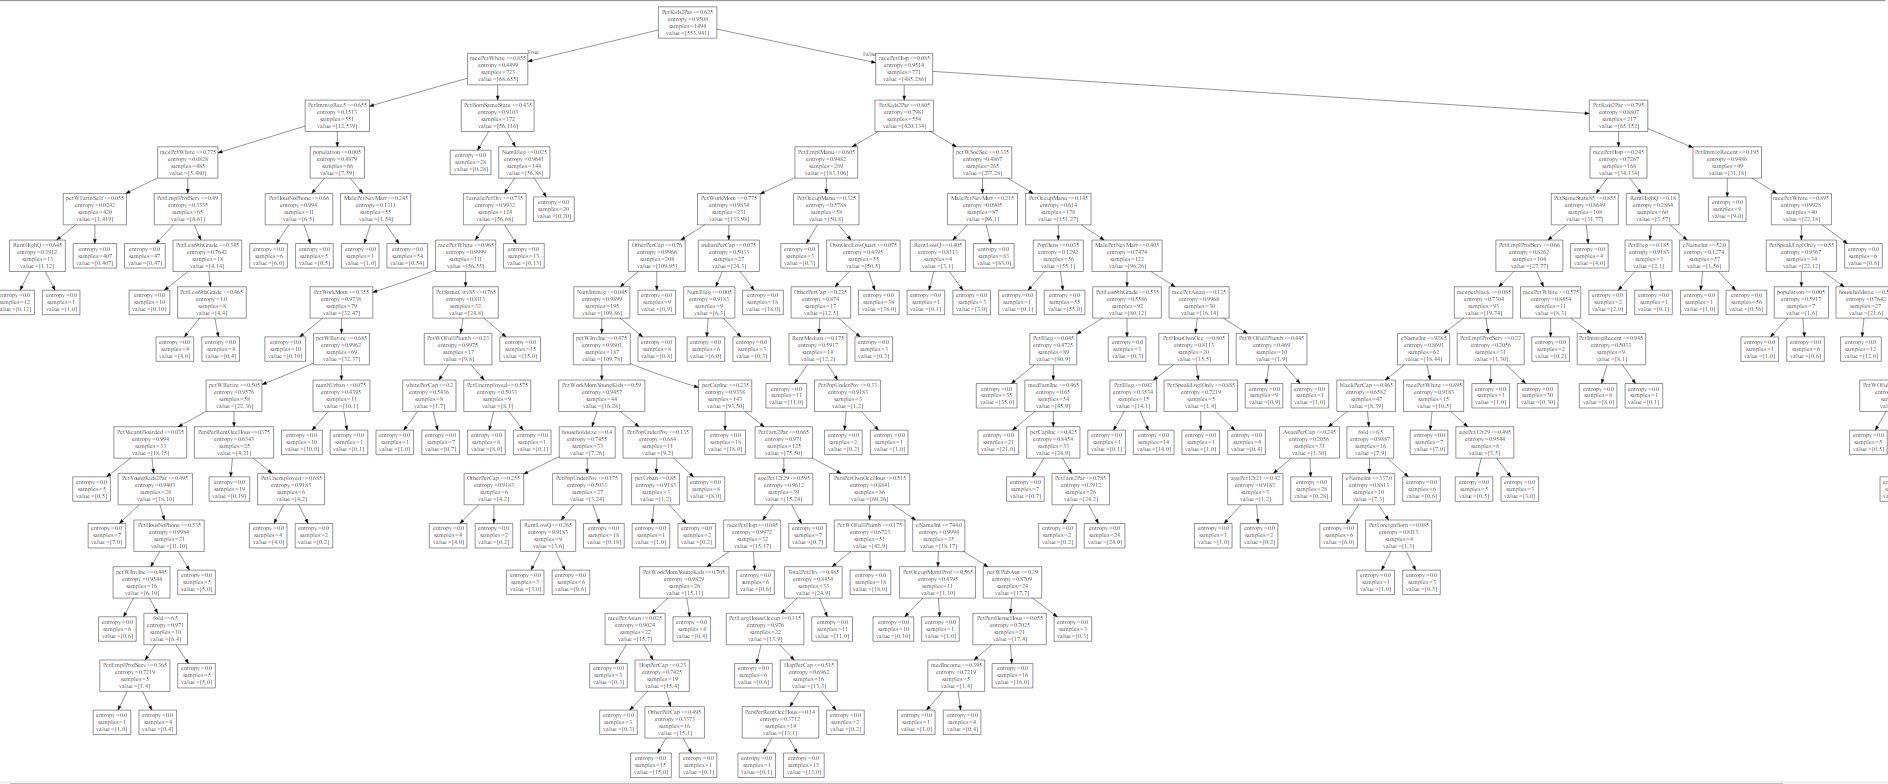

In [11]:
from IPython.display import Image
Image(filename='/Users/suveen/Documents/Crime Prediction Data/tree.jpg')

2.	Linear Classification

a.	Use GaussianNB to learn a Naive Bayes classifier to predict highCrime.

In [12]:
# a. i)
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
clf_gnb = GaussianNB() #getting GaussianNB classification method
clf_gnb.fit(X_train, y_train) #fitting training Data

GaussianNB(priors=None)

In [13]:
# i) What is the 10-fold cross-validation accuracy, precision, and recall for this method?
accuracy_cv =  cross_val_score(clf_gnb, X_train, y_train, cv=10) 
print('Cross Validation for Naive Bayes Accuracy:', accuracy_cv.mean()*100)
precision_cv =  cross_val_score(clf_gnb, X_train, y_train, cv=10 , scoring = 'precision')
print('Cross Validation for Naive Bayes Precision:', precision_cv.mean()*100)
recall_cv =  cross_val_score(clf_gnb, X_train, y_train, cv=10 , scoring = 'recall')
print('Cross Validation for Naive Bayes Recall:', recall_cv.mean()*100)

Cross Validation for Naive Bayes Accuracy: 76.4353971288
Cross Validation for Naive Bayes Precision: 93.6617828775
Cross Validation for Naive Bayes Recall: 67.97895189


a. ii)
What are the 10 most predictive features? This can be measured by the normalized absolute difference of means for the feature between the two classes:

|μ_T-μ_F |/(σ_T+σ_F )

The larger this different, the more predictive the feature. Why do these make sense (or not)?

This make sense as the larger difference provides us the variation in mean of target and feature data.


In [19]:
meanf = np.mean(X_test)
meant = np.mean(y_test)
stdf = np.std(X_test)
stdt = np.std(y_test)
norm = abs(meant-meanf)/(stdt+stdf)
norm.sort_values(ascending=False)

state                  1.692691
cNameInt               1.684912
fold                   1.493142
NumImmig               0.980298
NumStreet              0.963567
NumInShelters          0.945642
NumIlleg               0.912872
NumUnderPov            0.862371
population             0.851132
numbUrban              0.837724
LandArea               0.822946
HousVacant             0.809896
LemasPctOfficDrugUn    0.669992
racePctAsian           0.619062
PctUsePubTrans         0.593506
PctNotSpeakEnglWell    0.584251
indianPerCap           0.570847
racePctHisp            0.569090
PctRecentImmig         0.558263
PctRecImmig10          0.556012
PctRecImmig5           0.555719
PctRecImmig8           0.553960
racepctblack           0.546510
PctPersDenseHous       0.543722
PctVacantBoarded       0.520388
PopDens                0.508009
PctForeignBorn         0.500493
PctIlleg               0.468839
PctWOFullPlumb         0.464210
PctLargHouseOccup      0.452633
                         ...   
MalePctD

c. iii)
How do these results compare with your results from decision trees, above?

- When we compare the 10 fold CV results,

The accuracy in Decision Trees is around 75% and accuracy in GaussianNb is 76%.
The precision in Decision Trees is around 80% and precision in GaussianNb is 92%.
The recall in Decision Trees is around 81% and recall in GaussianNb is 68%.
As we know that the precision measure shows what percentage of positive predictions where correct, whereas recall measures what percentage of positive events were correctly predicted. To put it in a different way: precision is a measure of how good predictions are with regard to false positives, whereas recall is measures how good the predictions are with regard to false negatives.
From the above results, GaussianNb has high accuracy than Decision Tree as well as high precision. 
But when we consider the recall as an evaluation measure, Decision Tree fits the data well than GaussianNB.
Also, when we take into account the features extracted according to their importances, we have a different lists. 
'PctKids2Par' feature tops in Decision Tree and 'population' feature tops in GaussianNb after removing the outliers.



In [20]:
# b. i) Use LinearSVC to learn a linear Support Vector Machine model to predict highCrime
from sklearn.svm import LinearSVC
clf_svc = LinearSVC() 
clf_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [21]:
# b. i) What is the 10-fold cross-validation accuracy, precision, and recall for this method?
accuracy_svc = cross_val_score(clf_svc, X_train, y_train, cv=10)
print('Cross Validation for SVM Accuracy:', accuracy_svc.mean()*100)
precision_svc = cross_val_score(clf_svc, X_train, y_train, cv=10 , scoring = 'precision')
print('Cross Validation for SVM Precision:', precision_svc.mean()*100)
recall_svc = cross_val_score(clf_svc, X_train, y_train, cv=10 , scoring = 'recall')
print('Cross Validation for SVM Recall:', recall_svc.mean()*100)

Cross Validation for SVM Accuracy: 66.5558469265
Cross Validation for SVM Precision: 83.4203945542
Cross Validation for SVM Recall: 71.3842353952


In [22]:
# b. ii) What are the 10 most predictive features? This can be measured by the absolute feature weights in the model.
#        Why do these make sense (or not)?

w = clf_svc.coef_
w=w[0]
wf= zip(w, features)
sorted(wf, reverse=True)

[(0.84829299435318606, 'MedYrHousBuilt'),
 (0.54830049050455354, 'racepctblack'),
 (0.42320633040092653, 'PctSameCity85'),
 (0.4063454846512744, 'PctLess9thGrade'),
 (0.38403694123250537, 'PctPersDenseHous'),
 (0.38052671691408257, 'OtherPerCap'),
 (0.365270892738842, 'TotalPctDiv'),
 (0.36360054191370667, 'FemalePctDiv'),
 (0.36252750408341888, 'PctHousLess3BR'),
 (0.34729204111145567, 'MedRentPctHousInc'),
 (0.30989482905141852, 'PctPopUnderPov'),
 (0.29293107883031894, 'pctUrban'),
 (0.28266818280757017, 'PctYoungKids2Par'),
 (0.27905313460123854, 'MalePctDivorce'),
 (0.27213086831583688, 'PctVacantBoarded'),
 (0.25719646677752583, 'PctImmigRec10'),
 (0.25262825514588133, 'PctHousOccup'),
 (0.23774624147446979, 'racePctAsian'),
 (0.23096030644624549, 'PctSpeakEnglOnly'),
 (0.22145438601831546, 'pctWRetire'),
 (0.2021527040890386, 'PctBornSameState'),
 (0.18352109561541988, 'PctNotHSGrad'),
 (0.17800409161182632, 'OwnOccHiQuart'),
 (0.15867503106774811, 'MedRent'),
 (0.14692779398171

Top 10 predictive features: 

coef_ : array, shape (n_classes, n_features)
Coefficient of the features in the decision function. 

'racepctblack',
'MedYrHousBuilt',
'MedRentPctHousInc',
'LemasPctOfficDrugUn',
'pctUrban',
'PctYoungKids2Par',
'PersPerRentOccHous',
'PctOccupManu',
'PctTeen2Par',
'FemalePctDiv'

Top 10 features according to the coefficient values. 

Write reasonings
iii.	How do these results compare with your results from decision trees, above?

-- When we compare the 10 fold CV results,

The accuracy in Decision Trees is around 75% and accuracy in LinearSVC is 65%.
The precision in Decision Trees is around 80% and precision in LinearSVC is 83%.
The recall in Decision Trees is around 81% and recall in LinearSVC is 62%. 
Comparing both, we get better results in Decision Trees in accuracy but the precision is more in LinearSVC, this gives us that LinearSVC positives prediction was much better than the Decision Trees. But recall supports the fact that the number of positive events predicted using Decision Trees was higher than LinearSVC.

Also, when we take into account the features extracted according to their importances, we have a different lists. 
'PctKids2Par' feature tops in Decision Tree and 'racepctblack' feature tops in LinearSVC.


3.	Regression

Now you will attempt to directly predict the crime rate from the given features.

a.	Use LinearRegression to learn a linear model directly predicting the crime rate per capita (ViolentCrimesPerPop).


In [23]:
# a. i) Using 10-fold cross-validation, what is the estimated mean-squared-error (MSE) of the model?

from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

linreg = LinearRegression()  #Object of a Linear Regression Model
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
from sklearn.cross_validation import  cross_val_score
from sklearn.metrics import mean_squared_error

#MSE using 10 fold cross validation 
mse =  cross_val_score(linreg, X_train, y_train, cv=10 , scoring = 'neg_mean_squared_error')  
print("MSE CV: %.4f"% mse.mean()**2)

MSE CV: 0.0180


In [25]:
# a. ii) What is the MSE on the training set (train on all the data then test on it all)?

# Compute MSE on training data
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err, err)
# Compute RMSE
mse_train = np.sqrt(total_error/len(p))
print ("MSE on Training Data: %.4f" %mse_train)

MSE on Training Data: 0.3436


In [26]:
# a. iii) What features are most predictive of a high crime rate? A low crime rate?
wf= zip(linreg.coef_, features)
sorted(wf, reverse=True)


[(3.8971248710375779, 'population'),
 (0.97830569570420889, 'PctRecImmig8'),
 (0.96434376799664034, 'PctOccupMgmtProf'),
 (0.87833062261488215, 'PersPerOccupHous'),
 (0.81329493493483884, 'medFamInc'),
 (0.67443362593891276, 'MalePctDivorce'),
 (0.67203676539105484, 'agePct16t24'),
 (0.51266285104796805, 'FemalePctDiv'),
 (0.44866946244710237, 'agePct65up'),
 (0.39194661792272856, 'PctImmigRec10'),
 (0.37860060918889837, 'PersPerRentOccHous'),
 (0.37112809871462216, 'perCapInc'),
 (0.34155226717756937, 'PctForeignBorn'),
 (0.33973771064776875, 'racePctHisp'),
 (0.31167281149833692, 'PctRecImmig5'),
 (0.28613176916214456, 'OwnOccHiQuart'),
 (0.28197284299334596, 'RentHighQ'),
 (0.27565386212753284, 'RentMedian'),
 (0.23933359912996205, 'PctLargHouseFam'),
 (0.21675988636146268, 'PctHousLess3BR'),
 (0.19737361910449075, 'PctHousOwnOcc'),
 (0.1953440856526788, 'MedRentPctHousInc'),
 (0.17152274858937888, 'pctUrban'),
 (0.16185202794362163, 'PctBornSameState'),
 (0.15728049320780524, 'PctT

After removal of outliers, that are those features having extreme values than the remaining data. They are as follows:
 (5.1092037358217572, 'population'),
 (1.6207428207434895, 'PctHousOwnOcc'),
 (1.1702425571308117, 'medFamInc'),
 (1.0397244541511788, 'MalePctDivorce'),

Top 10 features that are predictive of HighCrime Rate :


 (0.88798569555627604, 'FemalePctDiv'),
 (0.82172797972381628, 'PctRecImmig5'),
 (0.74271093426258705, 'PersPerOccupHous'),
 (0.67713595456344311, 'RentHighQ'),
 (0.61487039456787151, 'agePct65up'),
 (0.50272600505832288, 'PctForeignBorn'),
 (0.47898481664713477, 'PctOccupMgmtProf'),
 (0.47560455461223317, 'perCapInc'),
 (0.42032914104038716, 'PctImmigRec10'),
 (0.358168007987691, 'racePctHisp'),

Similarly features that gives low crime : 
 (-0.38870788291703057, 'PctBSorMore'),
 (-0.40560787567013185, 'PctLargHouseOccup'),
 (-0.41141531180918711, 'OwnOccLowQuart'),
 (-0.41759990406475633, 'pctWWage'),
 (-0.46254149909995368, 'whitePerCap'),
 (-0.51043725405514528, 'pctWSocSec'),
 (-0.67350640793408934, 'PctRecentImmig'),
 (-0.79859360426297377, 'MedRent'),
 (-0.82989942932164462, 'medIncome'),
 (-0.96154887275129131, 'pctWInvInc')


b. Now use Ridge regression to reduce the amount of overfitting, using RidgeCV to pick the best alpha from among (10, 1, 0.1, 0.01, and 0.001).

In [27]:
from sklearn.linear_model import RidgeCV
from sklearn import linear_model

#RIDGE REGRESSION
list1 = [10, 1, 0.1, 0.01, 0.001]
clf_Ridge = linear_model.RidgeCV(list1)
clf_Ridge.fit(X_train, y_train)

RidgeCV(alphas=[10, 1, 0.1, 0.01, 0.001], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [28]:
print (clf_Ridge.alpha_ ) #best alpha

1.0


In [29]:
mse =  cross_val_score(clf_Ridge, X_train, y_train, cv=10 , scoring = 'neg_mean_squared_error')  
print("MSE CV: %.4f"% mse.mean()**2)

MSE CV: 0.0173


In [30]:
# a. ii) What is the MSE on the training set (train on all the data then test on it all)?

# Compute MSE on training data
p = clf_Ridge.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err, err)
# Compute RMSE
mse_train = np.sqrt(total_error/len(p))
print ("MSE on Training Data: %.4f" %mse_train)

MSE on Training Data: 0.3457


In [31]:
# b. iii) What is the best alpha?

print (clf_Ridge.alpha_ ) 

1.0


b. iv)	What does this say about the amount of overfitting in linear regression for this problem?

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The smaller the error, the closer we are to get the best fit in regression.

The ridge regression gives an estimate which minimise the sum of square error. 
MSE for Linear Regression is 0.0179 which is greater than Ridge Regression that is 0.0173, this mean that the line fitted best in Ridge Regression and thus is preferable. 

c . Now use polynomial features to do quadratic (second-order) polynomial regression

In [33]:
# c. i) What is the estimated MSE of the model under 10-fold CV?
#     ii) What is the MSE on the training set (train on all the data then test on it all)?

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

a = PolynomialFeatures(degree = 2)
X_n = a.fit_transform(X_train)
predict_n = a.fit_transform(X_test)

modelo = linear_model.LinearRegression()
modelo.fit(X_n, y_train)
print ("MSE on Training data: %.4f" % np.mean((modelo.predict(predict_n) - y_test) ** 2))

from sklearn.cross_validation import  cross_val_score
from sklearn.metrics import mean_squared_error

#MSE using 10 fold cross validation 
mse =  cross_val_score(clf_Ridge, X_train, y_train, cv=10 , scoring = 'neg_mean_squared_error')  
print("MSE in 10-fold CV: %.4f"% mse.mean() ** 2) 

MSE on Training data: 0.7973
MSE in 10-fold CV: 0.0173


iii.	Does this mean the quadratic model is better than the linear model for this problem?

According to the MSE, quadratic model is better than the linear model as its MSE is less. 

4.	Dirty Data

Repeat the decision tree learning question for the full (non-clean) data set and present the results.
a.	Are the CV results better or worse? What does this say about the effect of missing values?


In [34]:
df_D = pd.read_csv("/Users/suveen/Documents/Crime Prediction Data/communities-crime-full.csv")
df_D['HighCrime'] = (df_D['ViolentCrimesPerPop'] > 0.1)
df2_D, targets = encode_target(df_D, "communityname", "cNameInt")
df2_D, targets = encode_target(df2_D, "HighCrime", "Target")
df2_D

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,HighCrime,cNameInt,Target
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.06,0.04,0.9,0.5,0.32,0.14,0.20,True,0,1
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,?,?,?,0.00,?,0.67,True,1,1
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,?,?,?,0.00,?,0.43,True,2,1
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,?,?,?,0.00,?,0.12,True,3,1
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,?,?,?,0.00,?,0.03,False,4,0
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,?,?,?,?,0.00,?,0.14,True,5,1
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,?,?,?,?,0.00,?,0.03,False,6,0
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,?,?,?,?,0.00,?,0.55,True,7,1
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,?,?,?,?,0.00,?,0.53,True,8,1
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,?,?,?,?,0.00,?,0.15,True,9,1


In [35]:
df2_D = df2_D.drop('communityname',axis = 1)
df2_D = df2_D.replace('?', np.NaN)

In [36]:
def replaceNaN(dataframe):
    for a in dataframe:
        dataframe[a] = dataframe[a].replace(np.NaN, dataframe[a].median())

replaceNaN(df2_D)
df2_D

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,HighCrime,cNameInt,Target
0,8,23,48090,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.06,0.04,0.9,0.5,0.32,0.14,0.20,True,0,1
1,53,23,48090,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.08,0.03,0.75,0.5,0.00,0.15,0.67,True,1,1
2,24,23,48090,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.08,0.03,0.75,0.5,0.00,0.15,0.43,True,2,1
3,34,5,81440,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.08,0.03,0.75,0.5,0.00,0.15,0.12,True,3,1
4,42,95,6096,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.08,0.03,0.75,0.5,0.00,0.15,0.03,False,4,0
5,6,23,48090,1,0.02,0.28,0.06,0.54,1.00,0.25,...,0.08,0.03,0.75,0.5,0.00,0.15,0.14,True,5,1
6,44,7,41500,1,0.01,0.39,0.00,0.98,0.06,0.02,...,0.08,0.03,0.75,0.5,0.00,0.15,0.03,False,6,0
7,6,23,48090,1,0.01,0.74,0.03,0.46,0.20,1.00,...,0.08,0.03,0.75,0.5,0.00,0.15,0.55,True,7,1
8,21,23,48090,1,0.03,0.34,0.20,0.84,0.02,0.00,...,0.08,0.03,0.75,0.5,0.00,0.15,0.53,True,8,1
9,29,23,48090,1,0.01,0.40,0.06,0.87,0.30,0.03,...,0.08,0.03,0.75,0.5,0.00,0.15,0.15,True,9,1


In [37]:
features_D = list(df2_D)
features_D.remove("ViolentCrimesPerPop")
features_D.remove("HighCrime")
features_D.remove("Target")

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

y_D = df2_D['Target']     #Target data - HighCrime
x_D = df2_D[features_D]     #Features
X_trainD, X_testD, y_trainD, y_testD = train_test_split(x_D , y_D)
dt_D = DecisionTreeClassifier() #Object of DecisionTreeClassifier
dt_D.fit(X_trainD, y_trainD)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
# Accuracy , Precision and Recall on 10 fold CV using training data
from sklearn.cross_validation import  cross_val_score

accuracy_DCV =  cross_val_score(dt_D, X_trainD, y_trainD, cv=10)
print('Accuracy:', accuracy_DCV.mean()*100)
precision_DCV =  cross_val_score(dt_D, X_trainD, y_trainD, cv=10 , scoring = 'precision')
print('Precision:', precision_DCV.mean()*100)
recall_DCV =  cross_val_score(dt_D, X_trainD, y_trainD, cv=10 , scoring = 'recall')
print('Recall:', recall_DCV.mean()*100)

Accuracy: 76.5928955801
Precision: 81.7169962864
Recall: 80.679731243


As we have used the median values as a replacement of '?' , we found out the CV result accuracy(76%) for dirty data better than that of the clean data(75%). We took the median as around 80% data was missing. 
The precision and recall remains the same. 

5.	Teams 

a.	If you are working in a team of two people:
i.	Experiment with two learning methods other than those described above (one can be a non-linear kernel for SVM) for the classification problem, explaining clearly what you did. Show CV results for both the clean and full datasets.
ii.	What method gives the best results?
iii. What feature(s) seem to be most consistently predictive of high crime rates? How reliable is this conclusion?

                                            Clean Dataset CV results

In [40]:
#Non Linear kernel SVM - rbf 
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import svm

svc1 = svm.SVC(kernel='rbf')
svc1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
from sklearn.cross_validation import  cross_val_score

accuracy_SVMCV =  cross_val_score(svc1, X_train, y_train, cv=10) #10 fold cross validation
print('Cross Validation for SVM Accuracy:', accuracy_SVMCV.mean()*100)
precision_SVMCV =  cross_val_score(svc1, X_train, y_train, cv=10 , scoring = 'precision')
print('Cross Validation for SVM Precision:', precision_SVMCV.mean()*100)
recall_SVMCV =  cross_val_score(svc1, X_train, y_train, cv=10 , scoring = 'recall')
print('Cross Validation for SVM Recall:', recall_SVMCV.mean()*100)

Cross Validation for SVM Accuracy: 70.7466998533
Cross Validation for SVM Precision: 73.779039108
Cross Validation for SVM Recall: 84.8185137457


In [42]:
w = svc1.support_vectors_
w=w[0]
wf= zip(w, features)
sorted(wf, reverse=True)

[(687.0, 'cNameInt'),
 (22.0, 'state'),
 (3.0, 'fold'),
 (1.0, 'pctUrban'),
 (0.93000000000000005, 'PctImmigRec8'),
 (0.91000000000000003, 'PctImmigRec10'),
 (0.89000000000000001, 'PctSpeakEnglOnly'),
 (0.80000000000000004, 'PctSameState85'),
 (0.79000000000000004, 'PctEmplProfServ'),
 (0.78000000000000003, 'PctImmigRec5'),
 (0.78000000000000003, 'PctBornSameState'),
 (0.68999999999999995, 'FemalePctDiv'),
 (0.67000000000000004, 'TotalPctDiv'),
 (0.66000000000000003, 'PctSameCity85'),
 (0.65000000000000002, 'racePctWhite'),
 (0.64000000000000001, 'PctYoungKids2Par'),
 (0.59999999999999998, 'agePct12t29'),
 (0.59999999999999998, 'PctHousLess3BR'),
 (0.59999999999999998, 'MedOwnCostPctIncNoMtg'),
 (0.57999999999999996, 'PctWorkMomYoungKids'),
 (0.57999999999999996, 'PctVacMore6Mos'),
 (0.56999999999999995, 'PctHousOccup'),
 (0.56999999999999995, 'MalePctDivorce'),
 (0.56000000000000005, 'pctWRetire'),
 (0.56000000000000005, 'agePct12t21'),
 (0.56000000000000005, 'MedYrHousBuilt'),
 (0.55

In [43]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

clf_R = RandomForestClassifier()
clf_R.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred_rand = clf_R.predict(X_train)

In [46]:
from sklearn import metrics
print(metrics.confusion_matrix(y_train,y_pred_rand))

[[532   0]
 [ 11 951]]


In [47]:
from sklearn.cross_validation import  cross_val_score
accuracy_RF=  cross_val_score(clf_R, X_train, y_train, cv=10) #10 fold cross validation
print('Cross Validation for Random Forest Accuracy:', accuracy_RF.mean()*100)
precision_RF =  cross_val_score(clf_R, X_train, y_train, cv=10 , scoring = 'precision')
print('Cross Validation for Random Forest Precision:', precision_RF.mean()*100)
recall_RF =  cross_val_score(clf_R, X_train, y_train, cv=10 , scoring = 'recall')
print('Cross Validation for Random Forest Recall:', recall_RF.mean()*100)

Cross Validation for Random Forest Accuracy: 81.662296102
Cross Validation for Random Forest Precision: 87.471238808
Cross Validation for Random Forest Recall: 85.2437714777


In [48]:
w1 = clf_R.feature_importances_
wf1= zip(w1, features)
sorted(wf1, reverse=True)

[(0.11549498036815339, 'NumIlleg'),
 (0.064313192023517832, 'PctFam2Par'),
 (0.046258988420212283, 'PctIlleg'),
 (0.039449799044324531, 'racepctblack'),
 (0.032311113196620958, 'PctPopUnderPov'),
 (0.028790694812397266, 'FemalePctDiv'),
 (0.028123951503808708, 'racePctWhite'),
 (0.026118936044117663, 'racePctHisp'),
 (0.025821734586367117, 'PctNotSpeakEnglWell'),
 (0.025642269441794284, 'PctKids2Par'),
 (0.019505998848250966, 'PctPersDenseHous'),
 (0.016862453496104133, 'PctOccupMgmtProf'),
 (0.016297567422703465, 'HousVacant'),
 (0.011726819930819858, 'pctWInvInc'),
 (0.010967664987450443, 'PctEmplManu'),
 (0.010845192389016611, 'PctImmigRec10'),
 (0.010829306120908501, 'cNameInt'),
 (0.010536706304025208, 'PctForeignBorn'),
 (0.010484895096999399, 'TotalPctDiv'),
 (0.010378602084318535, 'PctYoungKids2Par'),
 (0.0098544390908356701, 'PctSameCity85'),
 (0.0096606362984648225, 'state'),
 (0.0095071272439000067, 'PctWorkMomYoungKids'),
 (0.009495475766610537, 'PctImmigRec5'),
 (0.0092008

The CV results i.e accuracy for Random Forest classifier(81%) are much better than non linear kernel SVC(70%). 
The feature 'racePctWhite' according to the feature importances is consistent in both the classifiers and thus
important in prediction of high crime rates.


                                                   Uncleaned Dataset

In [49]:
#Non Linear kernel SVM - rbf 

from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import svm

svc_D = svm.SVC(kernel='rbf')
svc_D.fit(X_trainD, y_trainD)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
from sklearn.cross_validation import  cross_val_score

accuracy_SVMCV =  cross_val_score(svc_D, X_train, y_train, cv=10) #10 fold cross validation
print('Cross Validation for SVM Accuracy:', accuracy_SVMCV.mean()*100)
precision_SVMCV =  cross_val_score(svc_D, X_train, y_train, cv=10 , scoring = 'precision')
print('Cross Validation for SVM Precision:', precision_SVMCV.mean()*100)
recall_SVMCV =  cross_val_score(svc_D, X_train, y_train, cv=10 , scoring = 'recall')
print('Cross Validation for SVM Recall:', recall_SVMCV.mean()*100)

Cross Validation for SVM Accuracy: 70.7466998533
Cross Validation for SVM Precision: 73.779039108
Cross Validation for SVM Recall: 84.8185137457


In [51]:
w_SVMD = svc1.support_vectors_
w_SVMD=w_SVMD[0]
wf_SVMD= zip(w_SVMD, features)
sorted(wf_SVMD, reverse=True)

[(687.0, 'cNameInt'),
 (22.0, 'state'),
 (3.0, 'fold'),
 (1.0, 'pctUrban'),
 (0.93000000000000005, 'PctImmigRec8'),
 (0.91000000000000003, 'PctImmigRec10'),
 (0.89000000000000001, 'PctSpeakEnglOnly'),
 (0.80000000000000004, 'PctSameState85'),
 (0.79000000000000004, 'PctEmplProfServ'),
 (0.78000000000000003, 'PctImmigRec5'),
 (0.78000000000000003, 'PctBornSameState'),
 (0.68999999999999995, 'FemalePctDiv'),
 (0.67000000000000004, 'TotalPctDiv'),
 (0.66000000000000003, 'PctSameCity85'),
 (0.65000000000000002, 'racePctWhite'),
 (0.64000000000000001, 'PctYoungKids2Par'),
 (0.59999999999999998, 'agePct12t29'),
 (0.59999999999999998, 'PctHousLess3BR'),
 (0.59999999999999998, 'MedOwnCostPctIncNoMtg'),
 (0.57999999999999996, 'PctWorkMomYoungKids'),
 (0.57999999999999996, 'PctVacMore6Mos'),
 (0.56999999999999995, 'PctHousOccup'),
 (0.56999999999999995, 'MalePctDivorce'),
 (0.56000000000000005, 'pctWRetire'),
 (0.56000000000000005, 'agePct12t21'),
 (0.56000000000000005, 'MedYrHousBuilt'),
 (0.55

In [52]:
#Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

clf_RD = RandomForestClassifier()
clf_RD.fit(X_trainD, y_trainD)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
from sklearn.cross_validation import  cross_val_score

accuracy_RFD =  cross_val_score(clf_RD, X_train, y_train, cv=10) #10 fold cross validation
print('Cross Validation for Random Forest Accuracy:', accuracy_RFD.mean()*100)
precision_RFD =  cross_val_score(clf_RD, X_train, y_train, cv=10 , scoring = 'precision')
print('Cross Validation for Random Forest Precision:', precision_RFD.mean()*100)
recall_RFD =  cross_val_score(clf_RD, X_train, y_train, cv=10 , scoring = 'recall')
print('Cross Validation for Random Forest Recall:', recall_RFD.mean()*100)

Cross Validation for Random Forest Accuracy: 79.5870927597
Cross Validation for Random Forest Precision: 86.5003613675
Cross Validation for Random Forest Recall: 84.5156786942


In [54]:
w1_D = clf_RD.feature_importances_
wf1_D = zip(w1, features)
sorted(wf1_D , reverse=True)

[(0.11549498036815339, 'NumIlleg'),
 (0.064313192023517832, 'PctFam2Par'),
 (0.046258988420212283, 'PctIlleg'),
 (0.039449799044324531, 'racepctblack'),
 (0.032311113196620958, 'PctPopUnderPov'),
 (0.028790694812397266, 'FemalePctDiv'),
 (0.028123951503808708, 'racePctWhite'),
 (0.026118936044117663, 'racePctHisp'),
 (0.025821734586367117, 'PctNotSpeakEnglWell'),
 (0.025642269441794284, 'PctKids2Par'),
 (0.019505998848250966, 'PctPersDenseHous'),
 (0.016862453496104133, 'PctOccupMgmtProf'),
 (0.016297567422703465, 'HousVacant'),
 (0.011726819930819858, 'pctWInvInc'),
 (0.010967664987450443, 'PctEmplManu'),
 (0.010845192389016611, 'PctImmigRec10'),
 (0.010829306120908501, 'cNameInt'),
 (0.010536706304025208, 'PctForeignBorn'),
 (0.010484895096999399, 'TotalPctDiv'),
 (0.010378602084318535, 'PctYoungKids2Par'),
 (0.0098544390908356701, 'PctSameCity85'),
 (0.0096606362984648225, 'state'),
 (0.0095071272439000067, 'PctWorkMomYoungKids'),
 (0.009495475766610537, 'PctImmigRec5'),
 (0.0092008

The CV results for both the classifiers are almost the same as that in cleaned data.

b.	If you are working in a team of three people:

i.	Do the requirement for two person teams.
ii.	Devise a method to find the most useful threshold for dividing high crime areas from low crime areas (i.e., discretizing XXX to compute highCrime). Define clearly what you mean by “useful”.
iii.	Show CV results for both the clean and full datasets for at least three different classification methods above.
iv.	How are these results similar and different from the previous results (with a fixed threshold of 0.1). What does this say about how to approach such a problem.

                                            Cleaned Dataset

In [55]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import  cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

df_Team = pd.read_csv("/Users/suveen/Documents/Crime Prediction Data/communities-crime-clean.csv")
df2_Team, targets = encode_target(df_Team, "communityname", "cNameInt")

In [56]:
features_Team = list(df2_Team)
features_Team.remove("communityname")
features_Team.remove("ViolentCrimesPerPop")

In [57]:
# Method : Threshold for Decision Trees

def printThreshold_DT(dataframe, features):
    df = dataframe.copy()
    t = 0.0
    while t <= 1.0 :
        df['HighCrime'] = (df['ViolentCrimesPerPop'] > t)
        df2, targets = encode_target(df, "HighCrime", "Target")
        y = df2['Target']     #Target data - HighCrime
        x = df2[features]     #Features
        X_train, X_test, y_train, y_test = train_test_split(x, y)
        dt = DecisionTreeClassifier() #Object of DecisionTreeClassifier
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy_dt = accuracy_score(y_test, y_pred)*100
        f1_dt = f1_score(y_test, y_pred)*100
        print("%.2f" %t, "%.4f" %accuracy_dt, "%.4f" %f1_dt)
        t += 0.01
        
printThreshold_DT(df2_Team, features_Team)

0.00 98.7976 99.3952
0.01 94.7896 97.3251
0.02 90.9820 95.1768
0.03 84.9699 91.4676
0.04 81.5631 89.0476
0.05 81.9639 88.8337
0.06 81.9639 88.4021
0.07 77.5551 84.8649
0.08 76.1523 83.4492
0.09 79.1583 83.8509
0.10 75.9519 81.0127
0.11 74.7495 79.7428
0.12 78.1563 81.3675
0.13 75.1503 79.0541
0.14 71.7435 73.8404
0.15 76.3527 77.1318
0.16 75.3507 72.9670
0.17 75.9519 72.7273
0.18 77.9559 75.7709
0.19 79.3587 75.7647
0.20 75.7515 69.2112
0.21 77.1543 70.1571
0.22 81.9639 76.1905
0.23 76.5531 66.6667
0.24 79.5591 70.6897
0.25 79.1583 68.8623
0.26 80.5611 68.1967
0.27 80.9619 67.3540
0.28 79.3587 61.4232
0.29 78.7575 63.6986
0.30 76.9539 57.5646
0.31 79.3587 62.2711
0.32 81.5631 68.0556
0.33 81.1623 63.2812
0.34 85.3707 68.9362
0.35 82.3647 57.2816
0.36 83.7675 57.1429
0.37 82.1643 57.0048
0.38 84.3687 65.4867
0.39 85.1703 60.2151
0.40 82.3647 55.1020
0.41 82.5651 55.3846
0.42 86.1723 61.0169
0.43 83.7675 56.6845
0.44 85.5711 52.0000
0.45 86.5731 58.8957
0.46 83.9679 43.6620
0.47 85.1703 

Accuracy at threshold 0.08 : 79.5591 %  and Accuracy at threshold 0.1 : 75 %
 
F1 Score at threshold 0.08 : 85.7143 %

In [58]:
# Method : Threshold for Random Forest Classifier

def printThreshold_RF(dataframe, features):
    df = dataframe.copy()
    t = 0.0
    while t <= 1.0 :
        df['HighCrime'] = (df['ViolentCrimesPerPop'] > t)
        df2, targets = encode_target(df, "HighCrime", "Target")
        y = df2['Target']     #Target data - HighCrime
        x = df2[features]     #Features
        X_train, X_test, y_train, y_test = train_test_split(x, y)
        dt = RandomForestClassifier() #Object of RandomForestClassifier
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy_dt = accuracy_score(y_test, y_pred)*100
        f1_dt = f1_score(y_test, y_pred)*100
        print("%.2f" %t, "%.4f" %accuracy_dt, "%.4f" %f1_dt)
        t += 0.01
        
printThreshold_RF(df2_Team, features_Team)

0.00 99.3988 99.6985
0.01 96.5932 98.2671
0.02 94.9900 97.3931
0.03 86.3727 92.3251
0.04 85.1703 91.0843
0.05 85.9719 91.4425
0.06 84.3687 89.8701
0.07 82.1643 87.7915
0.08 80.5611 85.8806
0.09 83.3667 87.4433
0.10 81.5631 85.7143
0.11 79.3587 83.1974
0.12 82.3647 85.4305
0.13 81.7635 83.7790
0.14 82.5651 83.1068
0.15 83.5671 83.3333
0.16 83.1663 81.4978
0.17 83.9679 82.0628
0.18 82.7655 78.5000
0.19 81.9639 77.9412
0.20 82.9659 77.6903
0.21 82.1643 75.7493
0.22 85.5711 77.6398
0.23 82.9659 75.3623
0.24 83.3667 73.6508
0.25 83.5671 73.0263
0.26 84.7695 73.6111
0.27 85.1703 74.6575
0.28 85.9719 73.2824
0.29 84.1683 67.4897
0.30 86.5731 71.9665
0.31 88.5772 71.6418
0.32 88.7776 73.8318
0.33 85.9719 70.0855
0.34 90.1804 76.7773
0.35 86.1723 66.9856
0.36 85.9719 60.6742
0.37 87.7756 60.6452
0.38 86.7735 59.7561
0.39 87.7756 63.9053
0.40 90.1804 69.1824
0.41 89.3788 63.9456
0.42 89.5792 59.3750
0.43 87.5752 54.4118
0.44 89.9800 60.9375
0.45 89.9800 57.6271
0.46 86.1723 42.0168
0.47 86.7735 

Accuracy at threshold 0.09 : 82.7655 % and Accuracy at threshold 0.1 : 81 %

F1 Score at threshold 0.09 : 86.7284 %

In [59]:
#Method : Threshold for Linear SVC

def printThreshold_SVC(dataframe, features):
    df = dataframe.copy()
    t = 0.0
    while t <= 1.0 :
        df['HighCrime'] = (df['ViolentCrimesPerPop'] > t)
        df2, targets = encode_target(df, "HighCrime", "Target")
        y = df2['Target']     #Target data - HighCrime
        x = df2[features]     #Features
        X_train, X_test, y_train, y_test = train_test_split(x, y)
        clf2 = LinearSVC() 
        clf2.fit(X_train, y_train)
        y_pred = clf2.predict(X_test)
        accuracy_dt = accuracy_score(y_test, y_pred)*100
        f1_dt = f1_score(y_test, y_pred)*100
        print("%.2f" %t, "%.4f" %accuracy_dt, "%.4f" %f1_dt)
        t += 0.01

printThreshold_SVC(df2_Team, features_Team)

0.00 99.7996 99.8997
0.01 94.3888 97.1074
0.02 34.4689 45.7711
0.03 88.1764 93.7167
0.04 60.9218 72.3404
0.05 78.5571 86.2644
0.06 60.3206 63.7363
0.07 71.3427 83.1962
0.08 65.1303 69.5804
0.09 69.7395 81.1014
0.10 38.2766 21.8274
0.11 61.7234 59.1006
0.12 65.1303 62.9787
0.13 74.5491 72.5702
0.14 69.7395 77.9562
0.15 77.3547 71.8204
0.16 57.9158 30.9211
0.17 78.5571 76.0626
0.18 57.7154 64.7746
0.19 70.5411 52.4272
0.20 82.3647 76.7196
0.21 65.7315 18.1818
0.22 43.4870 56.4815
0.23 80.9619 73.2394
0.24 80.5611 60.7287
0.25 82.7655 70.5479
0.26 73.9479 36.2745
0.27 83.7675 66.6667
0.28 82.3647 62.0690
0.29 86.3727 70.1754
0.30 75.7515 18.7919
0.31 77.5551 30.8642
0.32 36.8737 41.9890
0.33 82.3647 58.8785
0.34 75.7515 1.6260
0.35 81.7635 60.9442
0.36 82.7655 58.2524
0.37 86.5731 62.5698
0.38 86.1723 48.1203
0.39 85.7715 55.3459
0.40 83.1663 64.1026
0.41 85.3707 56.8047
0.42 34.6693 33.7398
0.43 64.3287 43.6709
0.44 85.7715 29.7030
0.45 81.1623 50.5263
0.46 82.3647 2.2222
0.47 87.1743 30

/Users/suveen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.91 97.7956 15.3846
0.92 48.0962 8.4806
0.93 96.9940 40.0000
0.94 94.5892 18.1818
0.95 97.9960 16.6667
0.96 97.3948 13.3333
0.97 95.9920 37.5000
0.98 97.5952 0.0000
0.99 97.7956 0.0000


Accuracy at threshold 0.11 : 76.9539 % and Accuracy at threshold 0.1 : 65 %

F1 Score at threshold 0.11 : 83.5479 %

                                                Uncleaned Dataset

In [60]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import  cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

df_Team_dirty = pd.read_csv("/Users/suveen/Documents/Crime Prediction Data/communities-crime-full.csv")
df2_Team_dirty, targets = encode_target(df_Team_dirty, "communityname", "cNameInt")
df2_Team_dirty

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,cNameInt
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,0
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.12,0.45,?,?,?,?,0.00,?,0.67,1
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.21,0.02,?,?,?,?,0.00,?,0.43,2
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.39,0.28,?,?,?,?,0.00,?,0.12,3
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.09,0.02,?,?,?,?,0.00,?,0.03,4
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.58,0.10,?,?,?,?,0.00,?,0.14,5
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.08,0.06,?,?,?,?,0.00,?,0.03,6
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.33,0.00,?,?,?,?,0.00,?,0.55,7
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.17,0.04,?,?,?,?,0.00,?,0.53,8
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.47,0.11,?,?,?,?,0.00,?,0.15,9


In [61]:
df2_Team_dirty = df2_Team_dirty.drop('communityname', axis = 1)
df2_Team_dirty = df2_Team_dirty.replace('?', np.NaN)
replaceNaN(df2_Team_dirty)

In [62]:
features_Team_dirty = list(df2_Team_dirty)
features_Team_dirty.remove("ViolentCrimesPerPop")

In [63]:
printThreshold_DT(df2_Team_dirty, features_Team_dirty)

0.00 99.3988 99.6985
0.01 95.3908 97.6264
0.02 89.1784 94.2060
0.03 82.9659 90.3299
0.04 79.9599 87.8935
0.05 83.5671 89.7243
0.06 79.5591 86.4000
0.07 77.9559 84.1954
0.08 77.3547 83.6469
0.09 78.5571 84.0537
0.10 78.1563 82.9953
0.11 75.3507 79.8030
0.12 77.7555 81.2816
0.13 75.1503 77.6173
0.14 73.9479 75.1908
0.15 78.7575 77.9167
0.16 75.3507 73.8854
0.17 74.7495 73.0769
0.18 78.9579 74.2015
0.19 77.3547 71.3924
0.20 83.3667 79.8054
0.21 77.7555 72.1805
0.22 81.3627 74.7967
0.23 78.1563 68.4058
0.24 79.9599 72.0670
0.25 77.3547 68.3473
0.26 79.1583 68.4848
0.27 80.1603 66.4407
0.28 79.9599 63.5036
0.29 80.3607 65.9722
0.30 79.9599 64.5390
0.31 76.9539 59.3640
0.32 82.5651 65.0602
0.33 82.9659 65.3061
0.34 84.3687 66.0870
0.35 82.9659 61.5385
0.36 83.7675 66.3900
0.37 79.7595 51.2077
0.38 81.5631 56.6038
0.39 80.7615 55.5556
0.40 83.1663 55.3191
0.41 80.5611 50.7614
0.42 82.3647 49.4253
0.43 82.7655 50.0000
0.44 84.1683 53.2544
0.45 84.7695 51.2821
0.46 87.3747 59.8726
0.47 85.3707 

Decision Tree Classifier
Accuracy at threshold 0.08 : 80.5611 %  and Accuracy at threshold 0.1 : 76 %
    
F1 Score at threshold 0.08 : 85.7143 %

In [65]:
printThreshold_RF(df2_Team_dirty, features_Team_dirty)

0.00 99.7996 99.8997
0.01 96.5932 98.2671
0.02 94.5892 97.1846
0.03 90.5812 94.7603
0.04 87.5752 92.8241
0.05 82.7655 89.1414
0.06 82.7655 88.1868
0.07 84.1683 88.7624
0.08 79.3587 84.6954
0.09 83.9679 87.2204
0.10 81.5631 85.5799
0.11 81.3627 85.1675
0.12 83.9679 85.7143
0.13 80.9619 83.1261
0.14 81.5631 83.1502
0.15 83.7675 82.7292
0.16 81.3627 78.9116
0.17 83.1663 80.4651
0.18 82.9659 80.2784
0.19 83.3667 78.6632
0.20 82.7655 77.9487
0.21 86.1723 82.8784
0.22 84.1683 76.6962
0.23 81.7635 73.3138
0.24 86.1723 77.6699
0.25 85.7715 75.2613
0.26 85.1703 70.4000
0.27 82.1643 68.9895
0.28 86.9739 76.0148
0.29 84.1683 70.4120
0.30 85.3707 71.8147
0.31 84.1683 69.7318
0.32 83.5671 64.9573
0.33 86.9739 69.4836
0.34 86.3727 68.2243
0.35 86.9739 64.0884
0.36 85.3707 62.9442
0.37 86.5731 63.3880
0.38 85.3707 65.0718
0.39 86.9739 60.6061
0.40 87.1743 58.4416
0.41 89.5792 61.7647
0.42 88.1764 57.5540
0.43 87.5752 60.7595
0.44 88.3768 66.6667
0.45 87.7756 59.0604
0.46 89.7796 57.8512
0.47 89.5792 

/Users/suveen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.97 97.1944 0.0000
0.98 97.9960 28.5714
0.99 97.7956 15.3846


Random Forest Classifier
Accuracy at threshold 0.18 : 87.3747 %  and Accuracy at threshold 0.1 : 81 %
  
F1 Score at threshold 0.18: 85.3147 %

In [67]:
printThreshold_SVC(df2_Team_dirty, features_Team_dirty)

0.00 99.3988 99.6985
0.01 97.5952 98.7830
0.02 93.3868 96.5803
0.03 15.0301 14.1700
0.04 17.4349 6.3636
0.05 79.3587 88.4916
0.06 28.4569 21.8818
0.07 71.5431 83.4112
0.08 69.3387 80.9938
0.09 67.3347 80.0977
0.10 67.7355 80.1968
0.11 65.5311 78.4461
0.12 56.3126 62.0209
0.13 55.5110 71.3918
0.14 51.9038 66.7590
0.15 49.8998 3.8462
0.16 54.5090 6.5844
0.17 52.9058 1.6736
0.18 45.2906 59.7938
0.19 55.3106 4.2918
0.20 39.2786 55.5066
0.21 47.4950 57.6052
0.22 40.6814 53.6050
0.23 38.4770 50.5636
0.24 68.7375 6.0241
0.25 65.9319 8.6022
0.26 67.5351 2.4096
0.27 37.2745 47.3950
0.28 39.0782 48.6486


/Users/suveen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.29 72.9459 0.0000
0.30 72.9459 0.0000
0.31 29.2585 40.0679
0.32 75.3507 3.1496
0.33 74.1483 0.0000
0.34 75.9519 0.0000
0.35 75.1503 0.0000
0.36 78.3567 0.0000
0.37 81.5631 0.0000
0.38 25.0501 29.6992
0.39 26.6533 31.4607
0.40 80.3607 0.0000
0.41 81.5631 0.0000
0.42 83.3667 0.0000
0.43 78.5571 0.0000
0.44 80.3607 12.5000
0.45 78.3567 20.5882
0.46 83.5671 12.7660
0.47 85.9719 0.0000
0.48 22.0441 26.7420
0.49 85.3707 5.1948
0.50 20.6413 23.5521
0.51 75.3507 23.6025
0.52 87.7756 0.0000
0.53 87.5752 0.0000
0.54 87.9760 3.2258
0.55 90.3808 0.0000
0.56 87.7756 0.0000
0.57 39.8798 20.6349
0.58 91.9840 0.0000
0.59 92.1844 0.0000
0.60 93.3868 0.0000
0.61 91.1824 0.0000
0.62 89.1784 0.0000
0.63 91.3828 0.0000
0.64 92.1844 0.0000
0.65 91.3828 0.0000
0.66 91.7836 0.0000
0.67 91.9840 0.0000
0.68 92.9860 0.0000
0.69 88.7776 15.1515
0.70 93.7876 0.0000
0.71 94.3888 0.0000
0.72 92.7856 0.0000
0.73 94.7896 0.0000
0.74 93.3868 0.0000
0.75 94.9900 0.0000
0.76 95.7916 0.0000
0.77 96.5932 0.0000
0.78 94.9

Linear SVC
Accuracy at threshold 0.07 : 70.3407 % and Accuracy at threshold 0.1 : 67 %
 
F1 Score at threshold 0.07 : 82.4645 %

The above results shows us choosing proper thresholds for particular model has an effect over accuracy and other measures. We chose F1 Score as it gives a balance between precision and recall and thus reduce the complexity of the results.


6.	Extra Credit

a.	Do a team requirement (above) that your team is not already required to do.
b.	Experiment with other learning methods such as polynomial or other kernels in SVM, decision forests, boosting, etc. and show your results. Make sure to explain clearly what you did.
i.	What method gives the best results?
ii.	What feature(s) seem to be most consistently predictive of high crime rates? How reliable is this conclusion?


In [68]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
dt_GradBoostCl = GradientBoostingClassifier()
dt_GradBoostCl.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [69]:
y_pred = dt.predict(X_test)
accuracy_GradBoostCl =  accuracy_score(y_test,y_pred)*100
print('Accuracy of Gradient Boosting Classifier: ', accuracy_GradBoostCl)
precision_GradBoostCl = precision_score(y_test,y_pred)*100
print('Precision of Gradient Boosting Classifier: ', precision_GradBoostCl)
recall_GradBoostCl = recall_score(y_test,y_pred)*100
print('Recall of Gradient Boosting Classifier: ', recall_GradBoostCl)

Accuracy of Gradient Boosting Classifier:  76.1523046092
Precision of Gradient Boosting Classifier:  79.4425087108
Recall of Gradient Boosting Classifier:  79.1666666667


In [70]:
wf_GradBoostCl= zip(dt_GradBoostCl.feature_importances_, features)
sorted(wf_GradBoostCl, reverse=True)

[(0.074819201329272153, 'PctKids2Par'),
 (0.038157998325711977, 'racePctWhite'),
 (0.037407577573698815, 'PctIlleg'),
 (0.032215824507041226, 'state'),
 (0.029949914965047883, 'PctYoungKids2Par'),
 (0.029370079406140306, 'PctImmigRec10'),
 (0.028468129865927283, 'cNameInt'),
 (0.024310260257011666, 'racepctblack'),
 (0.021297951646605237, 'NumIlleg'),
 (0.020717024822492363, 'blackPerCap'),
 (0.019070561083521457, 'MedRentPctHousInc'),
 (0.018951728659316731, 'PctPersDenseHous'),
 (0.018661894362209778, 'HousVacant'),
 (0.018063329857571534, 'AsianPerCap'),
 (0.01791120955696417, 'PersPerRentOccHous'),
 (0.01707630560295368, 'pctWInvInc'),
 (0.016887914763958865, 'PctTeen2Par'),
 (0.016689844993506023, 'PctEmplManu'),
 (0.015809248205434532, 'FemalePctDiv'),
 (0.015378695570439306, 'PctEmplProfServ'),
 (0.015223325507522128, 'racePctHisp'),
 (0.015219438709569457, 'PctHousOwnOcc'),
 (0.014811076782237032, 'HispPerCap'),
 (0.014640860781411646, 'PctImmigRecent'),
 (0.014034584245686422,

In [71]:
# Non Linear kernel SVM 

from sklearn import svm
svc1_extra = svm.SVC(kernel='rbf')
svc1_extra .fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
from sklearn.cross_validation import  cross_val_score
cvacc2_extra =  cross_val_score(svc1_extra, X_train, y_train, cv=10) #10 fold cross validation
print('Cross Validation for SVM Accuracy:',cvacc2_extra.mean()*100)
cvprecision2_extra =  cross_val_score(svc1_extra, X_train, y_train, cv=10 , scoring = 'precision')
print('Cross Validation for SVM Precision:',cvprecision2_extra.mean()*100)
cvrecall2_extra =  cross_val_score(svc1_extra, X_train, y_train, cv=10 , scoring = 'recall')
print('Cross Validation for SVM Recall:',cvrecall2_extra.mean()*100)

Cross Validation for SVM Accuracy: 70.7466998533
Cross Validation for SVM Precision: 73.779039108
Cross Validation for SVM Recall: 84.8185137457


In [73]:
w_extra = svc1_extra.support_vectors_
w_extra=w_extra[0]
wf_extra= zip(w_extra, features)
sorted(wf_extra, reverse=True)

[(687.0, 'cNameInt'),
 (22.0, 'state'),
 (3.0, 'fold'),
 (1.0, 'pctUrban'),
 (0.93000000000000005, 'PctImmigRec8'),
 (0.91000000000000003, 'PctImmigRec10'),
 (0.89000000000000001, 'PctSpeakEnglOnly'),
 (0.80000000000000004, 'PctSameState85'),
 (0.79000000000000004, 'PctEmplProfServ'),
 (0.78000000000000003, 'PctImmigRec5'),
 (0.78000000000000003, 'PctBornSameState'),
 (0.68999999999999995, 'FemalePctDiv'),
 (0.67000000000000004, 'TotalPctDiv'),
 (0.66000000000000003, 'PctSameCity85'),
 (0.65000000000000002, 'racePctWhite'),
 (0.64000000000000001, 'PctYoungKids2Par'),
 (0.59999999999999998, 'agePct12t29'),
 (0.59999999999999998, 'PctHousLess3BR'),
 (0.59999999999999998, 'MedOwnCostPctIncNoMtg'),
 (0.57999999999999996, 'PctWorkMomYoungKids'),
 (0.57999999999999996, 'PctVacMore6Mos'),
 (0.56999999999999995, 'PctHousOccup'),
 (0.56999999999999995, 'MalePctDivorce'),
 (0.56000000000000005, 'pctWRetire'),
 (0.56000000000000005, 'agePct12t21'),
 (0.56000000000000005, 'MedYrHousBuilt'),
 (0.55

In [74]:
# Decision Forest Classifier using Random forest classifier
from sklearn.ensemble import RandomForestClassifier
dt_RFC = RandomForestClassifier()
dt_RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
from sklearn.cross_validation import  cross_val_score
cvacc2_RFC =  cross_val_score(dt_RFC, X_train, y_train, cv=10) #10 fold cross validation
print('Cross Validation for Forest Classifier Accuracy:',cvacc2_RFC.mean()*100)
cvprecision2_RFC =  cross_val_score(dt_RFC, X_train, y_train, cv=10 , scoring = 'precision')
print('Cross Validation for Forest Classifier Precision:',cvprecision2_RFC.mean()*100)
cvrecall2_RFC =  cross_val_score(dt_RFC, X_train, y_train, cv=10 , scoring = 'recall')
print('Cross Validation for Forest Classifier Recall:',cvrecall2_RFC.mean()*100)

Cross Validation for Forest Classifier Accuracy: 80.1213387262
Cross Validation for Forest Classifier Precision: 87.9865267751
Cross Validation for Forest Classifier Recall: 84.095790378


In [76]:
wf_RFC= zip(dt_RFC.feature_importances_, features)
sorted(wf_RFC, reverse=True)

[(0.083142573119423496, 'racePctWhite'),
 (0.058508056910106784, 'PctKids2Par'),
 (0.049459548718773658, 'NumIlleg'),
 (0.03769325511674864, 'MalePctDivorce'),
 (0.036754134446698734, 'TotalPctDiv'),
 (0.036328287711488785, 'PctPersDenseHous'),
 (0.035143597527547782, 'PctPopUnderPov'),
 (0.033101659061771371, 'PctYoungKids2Par'),
 (0.030229859671860697, 'NumUnderPov'),
 (0.025268056432221624, 'PctTeen2Par'),
 (0.02001378025205781, 'PctFam2Par'),
 (0.017702447957028019, 'PctPersOwnOccup'),
 (0.017642217766079604, 'cNameInt'),
 (0.015978907178443118, 'racePctHisp'),
 (0.014971515852231897, 'PctIlleg'),
 (0.013566218801888425, 'FemalePctDiv'),
 (0.010876202009662172, 'NumStreet'),
 (0.010661619792646666, 'racepctblack'),
 (0.010184866386839481, 'pctWInvInc'),
 (0.0097513488479247616, 'PctForeignBorn'),
 (0.0096226634094904156, 'PctNotSpeakEnglWell'),
 (0.0094517385844038269, 'MalePctNevMarr'),
 (0.0091059098922495422, 'numbUrban'),
 (0.0089298974609473194, 'PctHousOccup'),
 (0.0086655446

Random Forest Classifier gives the best result among the three models including Gradient Boost Classifer and Non linear kernel SVM and has the accuracy of around 80% and the top most predictive feature of 'PctPersDenseHous'.

Although we can see that the two methods viz Gradient Boost Classifer and Non linear kernel SVM gives the feature 'PctYoungKids2Par' which can be reliable as the accuracy of both the classifier is above 70%. Hence we can take this feature into consideration while predicting the High Crime.